In [1]:
import pandas as pd # DataFrame, Series
import numpy as np # Scienitific computing packages - Array

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz

from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('./classification_dataset.csv')

In [3]:
data.head()

,Neighborhood,Is_Traffic,Is_fatal,Is_nighttime,Crime_type,Is_american_holiday,Is_canadian_holiday,Month,City,Season
0,montbello,False,False,True,Theft,False,False,10,Denver,Fall
1,northeast-park-hill,True,False,True,Traffic Accident,False,False,1,Denver,Winter
2,montbello,True,False,True,Traffic Accident,False,False,1,Denver,Winter
3,montbello,False,False,True,Offence Against a Person,False,False,1,Denver,Winter
4,lincoln-park,False,False,True,Theft of Vehicle,False,False,1,Denver,Winter


In [4]:
le = LabelEncoder()
le.fit(data['Season'])
data['Season'] = le.transform(data['Season'])

In [5]:
data.head()

,Neighborhood,Is_Traffic,Is_fatal,Is_nighttime,Crime_type,Is_american_holiday,Is_canadian_holiday,Month,City,Season
0,montbello,False,False,True,Theft,False,False,10,Denver,0
1,northeast-park-hill,True,False,True,Traffic Accident,False,False,1,Denver,3
2,montbello,True,False,True,Traffic Accident,False,False,1,Denver,3
3,montbello,False,False,True,Offence Against a Person,False,False,1,Denver,3
4,lincoln-park,False,False,True,Theft of Vehicle,False,False,1,Denver,3


In [6]:
data = pd.get_dummies(data)

In [7]:
data.head()

,Is_Traffic,Is_fatal,Is_nighttime,Is_american_holiday,Is_canadian_holiday,Month,Season,Neighborhood_Arbutus Ridge,Neighborhood_Central Business District,Neighborhood_Dunbar-Southlands,...,Crime_type_Mischief,Crime_type_Offence Against a Person,Crime_type_Other Crimes,Crime_type_Other Crimes,Crime_type_Theft,Crime_type_Theft from Vehicle,Crime_type_Theft of Vehicle,Crime_type_Traffic Accident,City_Denver,City_Vancouver
0,False,False,True,False,False,10,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,True,False,True,False,False,1,3,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,True,False,True,False,False,1,3,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,False,False,True,False,False,1,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,False,False,True,False,False,1,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [8]:
list(data.columns.values)

['Is_Traffic',
 'Is_fatal',
 'Is_nighttime',
 'Is_american_holiday',
 'Is_canadian_holiday',
 'Month',
 'Season',
 'Neighborhood_Arbutus Ridge',
 'Neighborhood_Central Business District',
 'Neighborhood_Dunbar-Southlands',
 'Neighborhood_Fairview',
 'Neighborhood_Grandview-Woodland',
 'Neighborhood_Hastings-Sunrise',
 'Neighborhood_Kensington-Cedar Cottage',
 'Neighborhood_Kerrisdale',
 'Neighborhood_Killarney',
 'Neighborhood_Kitsilano',
 'Neighborhood_Marpole',
 'Neighborhood_Mount Pleasant',
 'Neighborhood_Musqueam',
 'Neighborhood_Oakridge',
 'Neighborhood_Renfrew-Collingwood',
 'Neighborhood_Riley Park',
 'Neighborhood_Shaughnessy',
 'Neighborhood_South Cambie',
 'Neighborhood_Stanley Park',
 'Neighborhood_Strathcona',
 'Neighborhood_Sunset',
 'Neighborhood_Victoria-Fraserview',
 'Neighborhood_West End',
 'Neighborhood_West Point Grey',
 'Neighborhood_athmar-park',
 'Neighborhood_auraria',
 'Neighborhood_baker',
 'Neighborhood_barnum',
 'Neighborhood_barnum-west',
 'Neighborhood_b

In [9]:
train, test = train_test_split(data, test_size = 0.3)

In [10]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [11]:
features = list(data.columns.values)

In [12]:
x_train = train[features]
y_train = train["Season"]

x_test = test[features]
y_test = test["Season"]

In [13]:
dt = c.fit(x_train, y_train)

In [14]:
dt.score(x_train, y_train)

1.0

In [15]:
test_row = data.loc[1]

In [16]:
#Creating a dataframe where with the following attributes to have our model predict their seasons.

s = data.loc[(data["Is_nighttime"] == False) & (data["Crime_type_Theft"] == 1) & (data["City_Vancouver"] == 1)]

In [17]:
data.head()

,Is_Traffic,Is_fatal,Is_nighttime,Is_american_holiday,Is_canadian_holiday,Month,Season,Neighborhood_Arbutus Ridge,Neighborhood_Central Business District,Neighborhood_Dunbar-Southlands,...,Crime_type_Mischief,Crime_type_Offence Against a Person,Crime_type_Other Crimes,Crime_type_Other Crimes,Crime_type_Theft,Crime_type_Theft from Vehicle,Crime_type_Theft of Vehicle,Crime_type_Traffic Accident,City_Denver,City_Vancouver
0,False,False,True,False,False,10,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,True,False,True,False,False,1,3,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,True,False,True,False,False,1,3,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,False,False,True,False,False,1,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,False,False,True,False,False,1,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [18]:
dt.predict(s)

array([1, 3, 1, ..., 2, 2, 2])

In [19]:
#As you can see from the resulting predictions, the model predicted the seasons 100% accurately
s

,Is_Traffic,Is_fatal,Is_nighttime,Is_american_holiday,Is_canadian_holiday,Month,Season,Neighborhood_Arbutus Ridge,Neighborhood_Central Business District,Neighborhood_Dunbar-Southlands,...,Crime_type_Mischief,Crime_type_Offence Against a Person,Crime_type_Other Crimes,Crime_type_Other Crimes,Crime_type_Theft,Crime_type_Theft from Vehicle,Crime_type_Theft of Vehicle,Crime_type_Traffic Accident,City_Denver,City_Vancouver
6364,False,False,False,False,False,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6365,False,False,False,False,False,2,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6366,False,False,False,False,False,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6367,False,False,False,False,False,8,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6368,False,False,False,False,False,2,3,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660636,False,False,False,False,False,5,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
660637,False,False,False,False,False,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
660638,False,False,False,False,True,7,2,0,1,0,...,0,0,0,0,1,0,0,0,0,1
660639,False,False,False,False,False,6,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [20]:
dt.score(x_test, y_test)

1.0

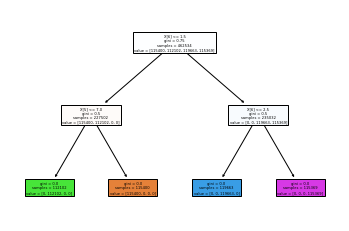

In [21]:
plt.figure()
tree.plot_tree(dt, filled=True)
plt.show()